In [17]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import cv2
import os

orignal =[]


In [18]:
#Read all test videos
test=[]
f= 'sample_images_RA'
Test_videos =[]
test_list = open('Labels/test.txt','r')
for line in test_list:
    name = line.split(" ")[0]
    x=line.split(" ")[-1]
    test.append(x[0])
    Test_videos.append(f+"/"+name)
    

In [19]:
for i in test:
    if i=='0':
        orignal.append('normal')
    else:
        orignal.append('abnormal')

In [20]:
#To load pre-trained model, trained on 5 classes 
#model = tf.keras.models.load_model('Trained Models/model_Q3D.h5',compile=False)
#model.summary()

#To load pre-trained weeights,
model = tf.keras.models.load_model('Trained Models/weights_model_Q3D.hdf5',compile=False)

In [21]:
#two classes labesl
labels0 ={0:'normal', 1:'abnormal'}
prediction = []

In [22]:
for video in Test_videos:
    vid = []  # reads frames of videos
    abnor = 0  # initialize abnormal count with 0
    path = video
    images = os.listdir(path)

    # Define frame drop rate
    frame_drop_rate = 3  # For example, drop every 2nd frame

    for idx, img in enumerate(images):
        if idx % frame_drop_rate == 0:  # Skip frames based on frame_drop_rate
            continue

        img_path = os.path.join(path, img)
        img2 = cv2.imread(img_path)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        vid.append(cv2.resize(img2, (112, 112)))

        if len(vid) == 32:
            X = np.array(vid, dtype=np.float32).transpose((2, 1, 0, 3))
            output = model.predict_on_batch(np.array([X]))

            if abnor == 3:
                break

            if len(output) > 0:
                str1 = labels0[np.argmax(output)]
                if str1 in ['vandalism', 'fighting', 'shooting', 'hockeyfight']:
                    abnor += 1
                else:
                    abnor = 0

            vid = []

    if abnor == 3:
        prediction.append('abnormal')
    else:
        prediction.append('normal')

In [23]:
len(prediction)

16

<AxesSubplot:>

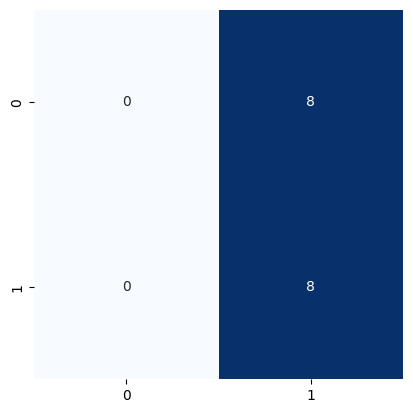

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(orignal, prediction)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)